In [16]:
import pycbc # A hard step, installed a Linux OS.
import numpy as np
import random
from pycbc.waveform import get_td_waveform
from pycbc.detector import Detector
apx = 'IMRPhenomPv2'
# General Noise, not randomed.
import matplotlib.pyplot as plt

import pycbc.noise
import pycbc.psd

# The color of the noise matches a PSD which you provide
flow = 40
delta_f = 1.0 / 40
flen = int(2048 / delta_f) + 1

T = 1024

psd_h1 = pycbc.psd.aLIGOZeroDetHighPowerGWINC(flen, delta_f, flow)
psd_v1 = pycbc.psd.analytical.AdvVirgo(flen, delta_f, flow)
psd_l1 = pycbc.psd.aLIGOZeroDetHighPowerGWINC(flen, delta_f, flow)
# NOTE: Inclination runs from 0 to pi, with poles at 0 and pi
#       coa_phase runs from 0 to 2 pi.


det_h1 = Detector('H1')
det_l1 = Detector('L1')
det_v1 = Detector('V1')
det_k1 = Detector('K1')

# Choose a GPS end time, sky location, and polarization phase for the merger
# NOTE: Right ascension and polarization phase runs from 0 to 2pi
# Declination runs from pi/2. to -pi/2 with the poles at pi/2. and -pi/2.


dec_range = np.linspace(0.1-np.pi/2, -0.1+np.pi/2, 9)

ra_range = np.linspace(2*np.pi/9, 2*np.pi,9)

mass1_range = np.linspace(20,30,4)
mass2_range = mass1_range
spin1z_range = np.linspace(0.2, 0.8,4)
spin2z_range = spin1z_range
inclination_range=np.linspace(2.34,np.pi,1)
pol_range=[0.9]

X = []
Y = []
for i1 in range(len(dec_range)):
    for i2 in range(len(ra_range)):
        print((i1, i2))
        for i3 in range(len(mass1_range)):
            for i4 in range(len(mass2_range)):
                if mass1_range[i3]<=mass2_range[i4]:
                    for i5 in range(len(spin1z_range)):
                        for i6 in range(len(spin2z_range)):
                            for i7 in range(len(inclination_range)):
                                for i8 in range(len(pol_range)):
                                #----------------------Random Noise Generation-------------------#
                                    seed_noise = random.randint(1,127)
                                    # Generate 1 seconds of noise at 4096 Hz
                                    delta_t = 1.0 / 2000


                                    X0 = []
                                    
                                    hp, hc = get_td_waveform(approximant=apx,
                                                             distance=600,
                                                             mass1=mass1_range[i3],
                                                             mass2=mass2_range[i4],
                                                             spin1z=spin1z_range[i5],
                                                             spin2z=spin2z_range[i6],
                                                             inclination=inclination_range[i7],
                                                             coa_phase=2.45,
                                                             delta_t=1.0/2000,
                                                             f_lower=40)

                                    signal_h1 = det_h1.project_wave(hp, hc,  ra_range[i2], dec_range[i1], pol_range[i8])
                                    signal_l1 = det_l1.project_wave(hp, hc,  ra_range[i2], dec_range[i1], pol_range[i8])
                                    signal_v1 = det_v1.project_wave(hp, hc,  ra_range[i2], dec_range[i1], pol_range[i8])
                                    
                                    signal_h1_array = np.array(signal_h1)[-T:] #+ np.array(noise_h1)
                                    #signal_h1_array = signal_h1_array[-T:] #+ np.array(noise_h1)
                                    
                                    signal_l1_array = np.array(signal_l1)[-T:] #+ np.array(noise_l1)
                                    #signal_l1_array = signal_l1_array[-T:] #+ np.array(noise_h1)
                                    
                                    signal_v1_array = np.array(signal_v1)[-T:] #+ np.array(noise_v1)
                                    #signal_v1_array = signal_v1_array[-T:] #+ np.array(noise_h1)
                                    
                                    #signal_k1_array = signal_k1_array[-T:] #+ np.array(noise_h1)
        
                                                                        
                                    list_h1 = signal_h1_array.tolist()
                                    list_l1 = signal_l1_array.tolist()
                                    list_v1 = signal_v1_array.tolist()
                                    
                                    h1_max = max(list_h1)*10**21
                                    l1_max = max(list_l1)*10**21
                                    v1_max = max(list_v1)*10**21
                                    
                            
                                    h1_max_index = list_h1.index(max(list_h1))
                                    l1_max_index = list_l1.index(max(list_l1))
                                    v1_max_index = list_v1.index(max(list_v1))
                                    
                                    X0.append([100*np.array(signal_h1.sample_times[h1_max_index-5:h1_max_index+6])-100*signal_h1.sample_times[h1_max_index-5],
                                               10**21*signal_h1_array[h1_max_index-5:h1_max_index+6]])
                                    X0.append([100*np.array(signal_l1.sample_times[l1_max_index-5:l1_max_index+6])-100*signal_l1.sample_times[h1_max_index-5],
                                               10**21*signal_l1_array[l1_max_index-5:l1_max_index+6]])
                                    X0.append([100*np.array(signal_v1.sample_times[v1_max_index-5:v1_max_index+6])-100*signal_v1.sample_times[h1_max_index-5],
                                               10**21*signal_v1_array[v1_max_index-5:v1_max_index+6]])
                                    
                                    X.append(X0)
                                                                        
                                    #----------Check the noisy wavefrom---------#
                                    #plt.plot(np.array(signal_h1.sample_times[h1_max_index-5:h1_max_index+6])-signal_h1.sample_times[h1_max_index-5],
                                    #           signal_h1_array[h1_max_index-5:h1_max_index+6], label='h1')
                                    #plt.plot(np.array(signal_l1.sample_times[l1_max_index-5:l1_max_index+6])-signal_l1.sample_times[h1_max_index-5],
                                    #           signal_l1_array[l1_max_index-5:l1_max_index+6], label='l1')
                                    #plt.plot(np.array(signal_v1.sample_times[v1_max_index-5:v1_max_index+6])-signal_v1.sample_times[h1_max_index-5],
                                    #           signal_v1_array[v1_max_index-5:v1_max_index+6], label='v1')
                                    #plt.plot(np.array(signal_k1.sample_times[k1_max_index-5:k1_max_index+6])-signal_k1.sample_times[h1_max_index-5],
                                    #           signal_k1_array[k1_max_index-5:k1_max_index+6], label='k1')
                                    #plt.axis('off')
                                    #plt.xticks([])
                                    #plt.yticks([])                                    
                                    #plt.legend()

                                    #plt.savefig(str(i1)+str(i2)+str(i3)+str(i4)+str(i5)+str(i6)+str(i7)+str(i8))

                                    #plt.close()
                                    #plt.show()
                                    #----------Check Over----------#
X = np.array(X)

print(X.shape)

np.save('X_6_29_train600mpc.npy', X)


(0, 0)


KeyboardInterrupt: 

In [17]:
X[0][0][1]

array([-0.05573394354661923, -0.3202610255214513, -0.38807146131367487,
       -0.15166837886753823, 0.23486654459699605, 0.3865593133253918,
       0.10176246986336278, -0.27208555440864113, -0.2332154608143364,
       0.10758591299084203, 0.2043004700972834], dtype=object)

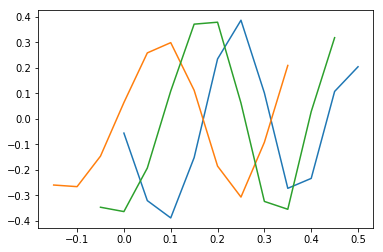

In [23]:
plt.plot(X[0][0][0], X[0][0][1])
plt.plot(X[0][1][0], X[0][1][1])
plt.plot(X[0][2][0], X[0][2][1])


In [3]:
dec_range

array([-1.47079633, -1.10309725, -0.73539816, -0.36769908,  0.        ,
        0.36769908,  0.73539816,  1.10309725,  1.47079633])

In [17]:
import pycbc # A hard step, installed a Linux OS.
import numpy as np
import random
from pycbc.waveform import get_td_waveform
from pycbc.detector import Detector
apx = 'IMRPhenomPv2'
# General Noise, not randomed.
import matplotlib.pyplot as plt

import pycbc.noise
import pycbc.psd

# The color of the noise matches a PSD which you provide
flow = 40
delta_f = 1.0 / 40
flen = int(2048 / delta_f) + 1

T = 1024

psd_h1 = pycbc.psd.aLIGOZeroDetHighPowerGWINC(flen, delta_f, flow)
psd_v1 = pycbc.psd.analytical.AdvVirgo(flen, delta_f, flow)
psd_l1 = pycbc.psd.aLIGOZeroDetHighPowerGWINC(flen, delta_f, flow)
# NOTE: Inclination runs from 0 to pi, with poles at 0 and pi
#       coa_phase runs from 0 to 2 pi.


det_h1 = Detector('H1')
det_l1 = Detector('L1')
det_v1 = Detector('V1')
det_k1 = Detector('K1')

# Choose a GPS end time, sky location, and polarization phase for the merger
# NOTE: Right ascension and polarization phase runs from 0 to 2pi
# Declination runs from pi/2. to -pi/2 with the poles at pi/2. and -pi/2.

dec_range = np.linspace(0.1-np.pi/2, -0.1+np.pi/2, 9)

ra_range = np.linspace(2*np.pi/9, 2*np.pi,9)

mass1_range = np.linspace(20,30,4)
mass2_range = mass1_range
spin1z_range = np.linspace(0.2, 0.8,4)
spin2z_range = spin1z_range
inclination_range=np.linspace(2.34,np.pi,1)
pol_range=[0.9]

X = []
Y = []
for i1 in range(len(dec_range)):
    for i2 in range(len(ra_range)):
        print((i1, i2))
        for i3 in range(len(mass1_range)):
            for i4 in range(len(mass2_range)):
                if mass1_range[i3]<=mass2_range[i4]:
                    for i5 in range(len(spin1z_range)):
                        for i6 in range(len(spin2z_range)):
                            for i7 in range(len(inclination_range)):
                                for i8 in range(len(pol_range)):
                                #----------------------Random Noise Generation-------------------#
                                    seed_noise = random.randint(1,127)
                                    # Generate 1 seconds of noise at 4096 Hz
                                    delta_t = 1.0 / 2000


                                    X0 = []
                                    
                                    hp, hc = get_td_waveform(approximant=apx,
                                                             distance=600,
                                                             mass1=mass1_range[i3],
                                                             mass2=mass2_range[i4],
                                                             spin1z=spin1z_range[i5],
                                                             spin2z=spin2z_range[i6],
                                                             inclination=inclination_range[i7],
                                                             coa_phase=2.45,
                                                             delta_t=1.0/2000,
                                                             f_lower=40)

                                    signal_h1 = det_h1.project_wave(hp, hc,  ra_range[i2], dec_range[i1], pol_range[i8])
                                    signal_l1 = det_l1.project_wave(hp, hc,  ra_range[i2], dec_range[i1], pol_range[i8])
                                    
                                    signal_h1_array = np.array(signal_h1)[-T:] #+ np.array(noise_h1)
                                    #signal_h1_array = signal_h1_array[-T:] #+ np.array(noise_h1)
                                    
                                    signal_l1_array = np.array(signal_l1)[-T:] #+ np.array(noise_l1)
                                    #signal_l1_array = signal_l1_array[-T:] #+ np.array(noise_h1)
                                            
                                                                        
                                    list_h1 = signal_h1_array.tolist()
                                    list_l1 = signal_l1_array.tolist()
                                    list_v1 = signal_v1_array.tolist()
                                    
                                    h1_max = max(list_h1)*10**21
                                    l1_max = max(list_l1)*10**21
                                    
                            
                                    h1_max_index = list_h1.index(max(list_h1))
                                    l1_max_index = list_l1.index(max(list_l1))
                                    
                                    X0.append([100*np.array(signal_h1.sample_times[h1_max_index-5:h1_max_index+6])-100*signal_h1.sample_times[h1_max_index-5],
                                               10**21*signal_h1_array[h1_max_index-5:h1_max_index+6]])
                                    X0.append([100*np.array(signal_l1.sample_times[l1_max_index-5:l1_max_index+6])-100*signal_l1.sample_times[h1_max_index-5],
                                               10**21*signal_l1_array[l1_max_index-5:l1_max_index+6]])
                                    
                                    X.append(X0)
                                                                        
                                    #----------Check the noisy wavefrom---------#
                                    #plt.plot(np.array(signal_h1.sample_times[h1_max_index-5:h1_max_index+6])-signal_h1.sample_times[h1_max_index-5],
                                    #           signal_h1_array[h1_max_index-5:h1_max_index+6], label='h1')
                                    #plt.plot(np.array(signal_l1.sample_times[l1_max_index-5:l1_max_index+6])-signal_l1.sample_times[h1_max_index-5],
                                    #           signal_l1_array[l1_max_index-5:l1_max_index+6], label='l1')
                                    #plt.plot(np.array(signal_v1.sample_times[v1_max_index-5:v1_max_index+6])-signal_v1.sample_times[h1_max_index-5],
                                    #           signal_v1_array[v1_max_index-5:v1_max_index+6], label='v1')
                                    #plt.plot(np.array(signal_k1.sample_times[k1_max_index-5:k1_max_index+6])-signal_k1.sample_times[h1_max_index-5],
                                    #           signal_k1_array[k1_max_index-5:k1_max_index+6], label='k1')
                                    #plt.axis('off')
                                    #plt.xticks([])
                                    #plt.yticks([])                                    
                                    #plt.legend()

                                    #plt.savefig(str(i1)+str(i2)+str(i3)+str(i4)+str(i5)+str(i6)+str(i7)+str(i8))

                                    #plt.close()
                                    #plt.show()
                                    #----------Check Over----------#
X = np.array(X)

print(X.shape)

np.save('X_6_29_hltrain600mpc.npy', X)


(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(3, 0)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(4, 0)
(4, 1)
(4, 2)
(4, 3)
(4, 4)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(5, 0)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
(5, 5)
(5, 6)
(5, 7)
(5, 8)
(6, 0)
(6, 1)
(6, 2)
(6, 3)
(6, 4)
(6, 5)
(6, 6)
(6, 7)
(6, 8)
(7, 0)
(7, 1)
(7, 2)
(7, 3)
(7, 4)
(7, 5)
(7, 6)
(7, 7)
(7, 8)
(8, 0)
(8, 1)
(8, 2)
(8, 3)
(8, 4)
(8, 5)
(8, 6)
(8, 7)
(8, 8)
(12960, 2, 2, 11)
